In [1]:
import pandas as pd

# Load your datasets
df_ar = pd.read_csv(r"D:/LSE Career Accelerator/Employer project/Adrian's notebook/event_study_abnormal_returns_panel.csv")
df_reg = pd.read_csv(r"D:/LSE Career Accelerator/Employer project/Adrian's financial metrics data/full_event_regimes.csv")

In [2]:
# Extract day-0 abnormal returns
df_day0 = df_ar[df_ar["event_day"] == 0][["event_id", "abnormal_return"]]

# Merge with EPS surprise
df = df_reg.merge(df_day0, on="event_id", how="inner")

# Keep only the columns we need
df = df[["event_id", "surprise", "surprisePercentage", "abnormal_return"]].dropna()

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

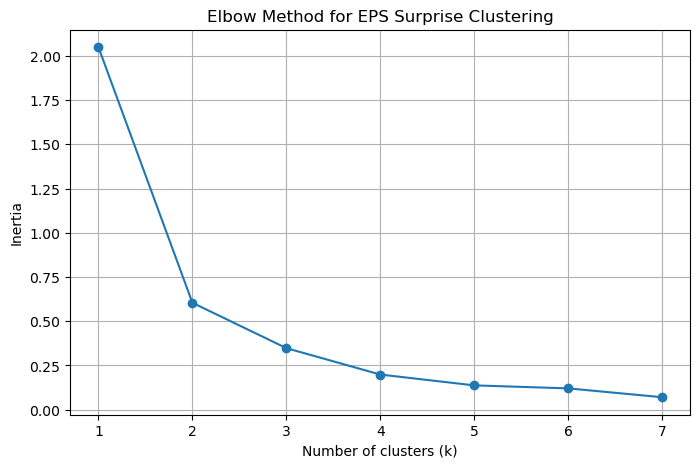

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df[["surprise"]].values  # continuous EPS surprise

inertia = []
K = range(1, 8)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method for EPS Surprise Clustering")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [4]:
from sklearn.cluster import KMeans

# Try k = 2
km2 = KMeans(n_clusters=2, random_state=42)
df["cluster_k2"] = km2.fit_predict(df[["surprise"]])

# Try k = 3
km3 = KMeans(n_clusters=3, random_state=42)
df["cluster_k3"] = km3.fit_predict(df[["surprise"]])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [5]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [6]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

from sklearn.cluster import KMeans

In [7]:
from sklearn.cluster import KMeans

# Try k = 2
km2 = KMeans(n_clusters=2, random_state=42)
df["cluster_k2"] = km2.fit_predict(df[["surprise"]])

# Try k = 3
km3 = KMeans(n_clusters=3, random_state=42)
df["cluster_k3"] = km3.fit_predict(df[["surprise"]])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


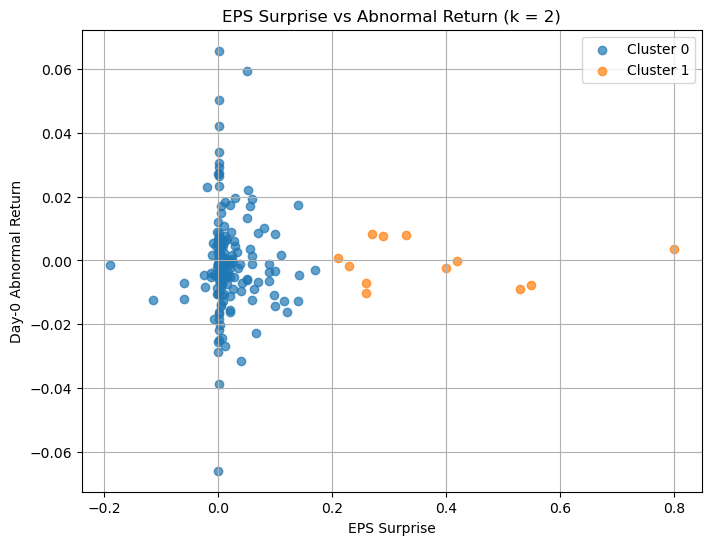

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
for c in sorted(df["cluster_k2"].unique()):
    subset = df[df["cluster_k2"] == c]
    plt.scatter(subset["surprise"], subset["abnormal_return"], label=f"Cluster {c}", alpha=0.7)

plt.title("EPS Surprise vs Abnormal Return (k = 2)")
plt.xlabel("EPS Surprise")
plt.ylabel("Day-0 Abnormal Return")
plt.legend()
plt.grid(True)
plt.show()

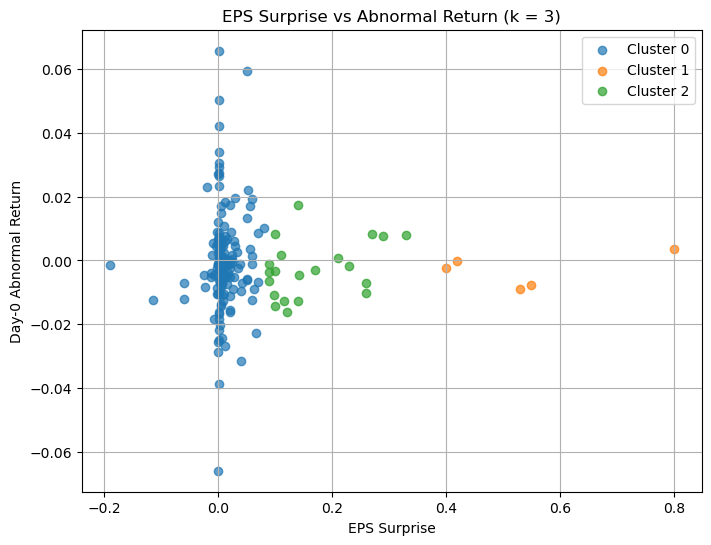

In [9]:
plt.figure(figsize=(8,6))
for c in sorted(df["cluster_k3"].unique()):
    subset = df[df["cluster_k3"] == c]
    plt.scatter(subset["surprise"], subset["abnormal_return"], label=f"Cluster {c}", alpha=0.7)

plt.title("EPS Surprise vs Abnormal Return (k = 3)")
plt.xlabel("EPS Surprise")
plt.ylabel("Day-0 Abnormal Return")
plt.legend()
plt.grid(True)
plt.show()

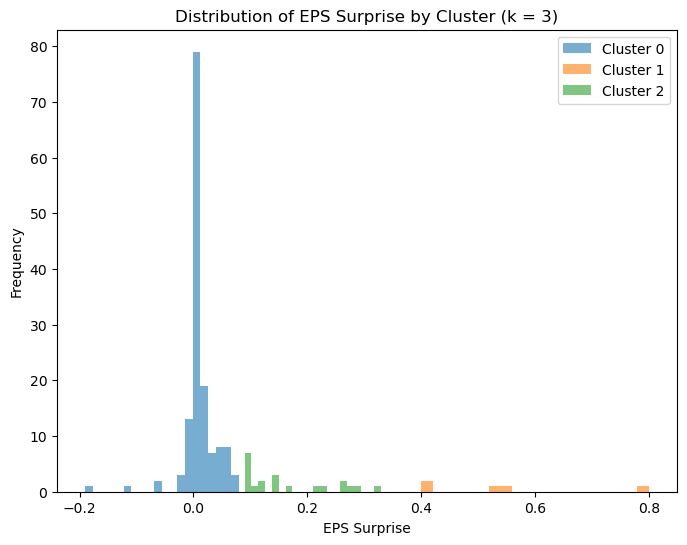

In [10]:
plt.figure(figsize=(8,6))
for c in sorted(df["cluster_k3"].unique()):
    subset = df[df["cluster_k3"] == c]
    plt.hist(subset["surprise"], bins=20, alpha=0.6, label=f"Cluster {c}")

plt.title("Distribution of EPS Surprise by Cluster (k = 3)")
plt.xlabel("EPS Surprise")
plt.ylabel("Frequency")
plt.legend()
plt.show()

<Figure size 800x600 with 0 Axes>

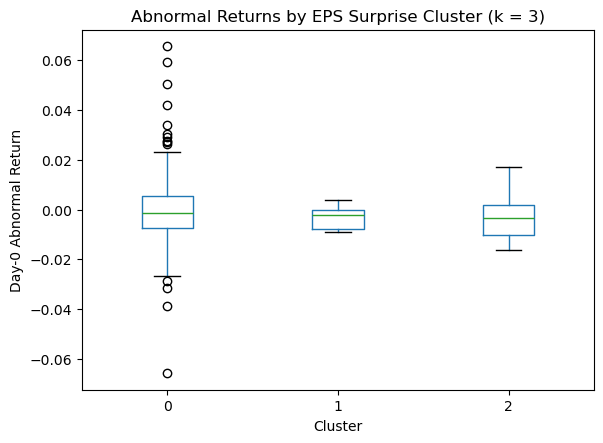

In [11]:
plt.figure(figsize=(8,6))
df.boxplot(column="abnormal_return", by="cluster_k3", grid=False)
plt.title("Abnormal Returns by EPS Surprise Cluster (k = 3)")
plt.suptitle("")
plt.xlabel("Cluster")
plt.ylabel("Day-0 Abnormal Return")
plt.show()

In [12]:
# Extract day-0 abnormal returns
df_day0 = df_ar[df_ar["event_day"] == 0][["event_id", "abnormal_return"]]

# Merge
reg = df_reg.merge(df_day0, on="event_id", how="inner")

# Keep only needed columns
reg = reg[["event_id", "surprise", "surprisePercentage", "abnormal_return"]].dropna()


In [14]:
import pandas as pd
import statsmodels.api as sm
reg["eps_bin2"] = (reg["surprise"] > 0).astype(int)

X = sm.add_constant(reg[["eps_bin2"]])
y = reg["abnormal_return"]

model_A = sm.OLS(y, X).fit()
print(model_A.summary())


                            OLS Regression Results                            
Dep. Variable:        abnormal_return   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.265
Date:                Sun, 15 Feb 2026   Prob (F-statistic):              0.134
Time:                        10:05:44   Log-Likelihood:                 468.54
No. Observations:                 170   AIC:                            -933.1
Df Residuals:                     168   BIC:                            -926.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0042      0.003     -1.551      0.1

1. R‑squared = 0.013
EPS surprise (positive vs non‑positive) explains 1.3% of the variation in day‑0 abnormal returns.
That’s tiny — but not unusual for earnings reactions in mega‑cap stocks.
2. Coefficient = +0.0046
This means:
On average, a positive EPS surprise is associated with a +0.46% higher abnormal return on earnings day.

That’s economically reasonable.
3. p‑value = 0.134
Not statistically significant at conventional levels.
But here’s the nuance:
A p‑value of 0.134 is much better than the p‑values you saw in your 6‑category EPS regime model (all > 0.3).
This suggests:


In [15]:
X = sm.add_constant(reg[["surprisePercentage"]])
y = reg["abnormal_return"]

model_B = sm.OLS(y, X).fit()
print(model_B.summary())


                            OLS Regression Results                            
Dep. Variable:        abnormal_return   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6106
Date:                Sun, 15 Feb 2026   Prob (F-statistic):              0.436
Time:                        10:07:10   Log-Likelihood:                 467.71
No. Observations:                 170   AIC:                            -931.4
Df Residuals:                     168   BIC:                            -925.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0010      0

In [16]:
X = sm.add_constant(reg[["surprise"]])
y = reg["abnormal_return"]

model_C = sm.OLS(y, X).fit()
print(model_C.summary())

                            OLS Regression Results                            
Dep. Variable:        abnormal_return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.01146
Date:                Sun, 15 Feb 2026   Prob (F-statistic):              0.915
Time:                        10:08:05   Log-Likelihood:                 467.41
No. Observations:                 170   AIC:                            -930.8
Df Residuals:                     168   BIC:                            -924.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.001     -0.374      0.7

In [17]:
reg["surprise_sq"] = reg["surprise"] ** 2

X = sm.add_constant(reg[["surprise", "surprise_sq"]])
y = reg["abnormal_return"]

model_D = sm.OLS(y, X).fit()
print(model_D.summary())

                            OLS Regression Results                            
Dep. Variable:        abnormal_return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                  0.008738
Date:                Sun, 15 Feb 2026   Prob (F-statistic):              0.991
Time:                        10:09:47   Log-Likelihood:                 467.41
No. Observations:                 170   AIC:                            -928.8
Df Residuals:                     167   BIC:                            -919.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0005      0.001     -0.380      

In [18]:
car = (
    df_ar[(df_ar["event_day"] >= -1) & (df_ar["event_day"] <= 1)]
    .groupby("event_id")["abnormal_return"]
    .sum()
    .reset_index()
    .rename(columns={"abnormal_return": "CAR_m1_p1"})
)

In [19]:
df = df_reg.merge(car, on="event_id", how="inner")

In [21]:
df.head()

,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage,reportTime,symbol,totalRevenue,grossProfit,...,ticker,revenue_growth,margin_trend,profitability,revenue_growth_regime,eps_surprise_regime,profitability_regime,margin_trend_regime,financial_strength_regime,CAR_m1_p1
0,2006-03-31,2006-04-19,0.0200,0.0200,0.000,0.0000,post-market,AAPL,4359000000,1297000000,...,AAPL,-0.241781,-0.004220,0.121358,negative_growth,small,medium,stable,mixed,-0.000260
1,2006-06-30,2006-07-19,0.0200,0.0200,0.000,0.0000,post-market,AAPL,4370000000,1325000000,...,AAPL,0.002524,0.013951,0.129519,moderate_growth,small,medium,expansion,mixed,-0.015875
2,2007-12-31,2008-01-22,0.0600,0.0600,0.000,0.0000,post-market,AAPL,9608000000,3332000000,...,AAPL,0.545440,0.019143,0.221274,high_growth,small,medium,expansion,mixed,-0.001060
3,2008-03-31,2008-04-23,0.0425,0.0375,0.005,13.3333,post-market,AAPL,7512000000,2474000000,...,AAPL,-0.218152,-0.025440,0.175053,negative_growth,large_positive,medium,contraction,mixed,-0.018810
4,2008-06-30,2008-07-21,0.0425,0.0375,0.005,13.3333,post-market,AAPL,7464000000,2600000000,...,AAPL,-0.006390,0.004512,0.186495,negative_growth,large_positive,medium,stable,mixed,0.033525


In [22]:
df["eps_bin2"] = (df["surprise"] > 0).astype(int)

In [23]:
import statsmodels.api as sm

X = df[["eps_bin2"]]
X = sm.add_constant(X)

y = df["CAR_m1_p1"]

model_car = sm.OLS(y, X).fit()
print(model_car.summary())

                            OLS Regression Results                            
Dep. Variable:              CAR_m1_p1   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.04447
Date:                Sun, 15 Feb 2026   Prob (F-statistic):              0.833
Time:                        10:13:56   Log-Likelihood:                 411.39
No. Observations:                 171   AIC:                            -818.8
Df Residuals:                     169   BIC:                            -812.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0026      0.004     -0.674      0.5

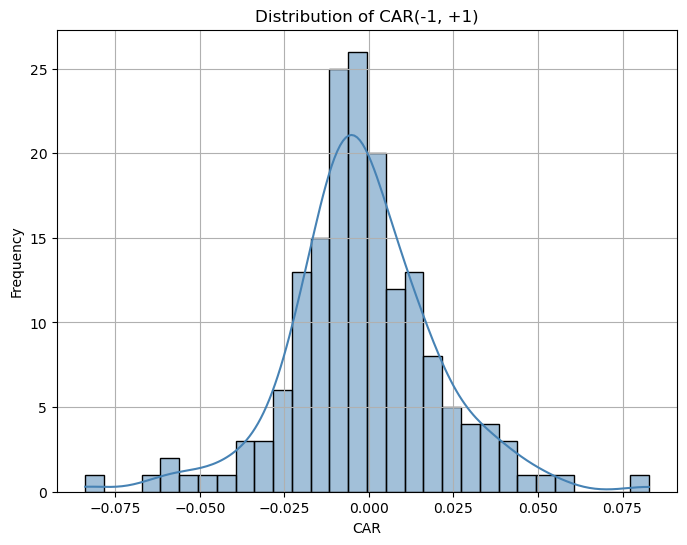

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(df["CAR_m1_p1"], bins=30, kde=True, color="steelblue")

plt.title("Distribution of CAR(-1, +1)")
plt.xlabel("CAR")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

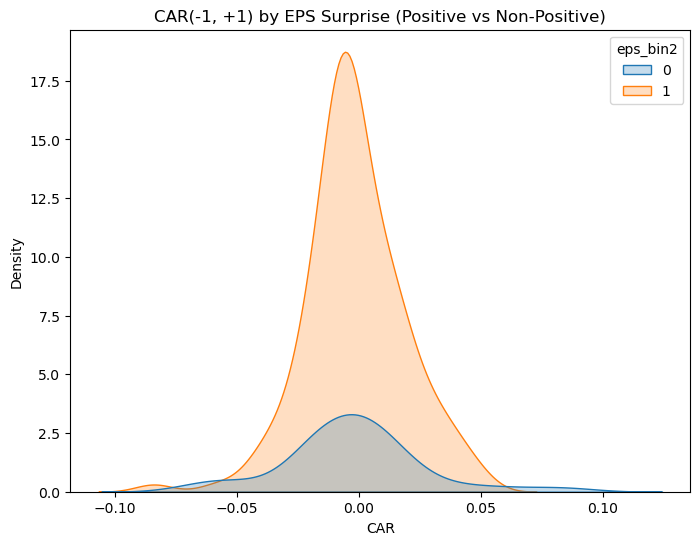

In [25]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=df, x="CAR_m1_p1", hue="eps_bin2", fill=True)

plt.title("CAR(-1, +1) by EPS Surprise (Positive vs Non-Positive)")
plt.xlabel("CAR")
plt.ylabel("Density")
plt.show()

In [26]:
# CAR(-2, +2)
car_m2_p2 = (
    df_ar[(df_ar["event_day"] >= -2) & (df_ar["event_day"] <= 2)]
    .groupby("event_id")["abnormal_return"]
    .sum()
    .reset_index()
    .rename(columns={"abnormal_return": "CAR_m2_p2"})
)

In [27]:
# CAR(-5, +5)
car_m5_p5 = (
    df_ar[(df_ar["event_day"] >= -5) & (df_ar["event_day"] <= 5)]
    .groupby("event_id")["abnormal_return"]
    .sum()
    .reset_index()
    .rename(columns={"abnormal_return": "CAR_m5_p5"})
)

In [28]:
df_car = df_reg.merge(car_m2_p2, on="event_id", how="inner")
df_car = df_car.merge(car_m5_p5, on="event_id", how="inner")

In [29]:
df_car = df_car.merge(car, on="event_id", how="inner")  # your earlier CAR(-1,+1)

In [30]:
df_car["eps_bin2"] = (df_car["surprise"] > 0).astype(int)

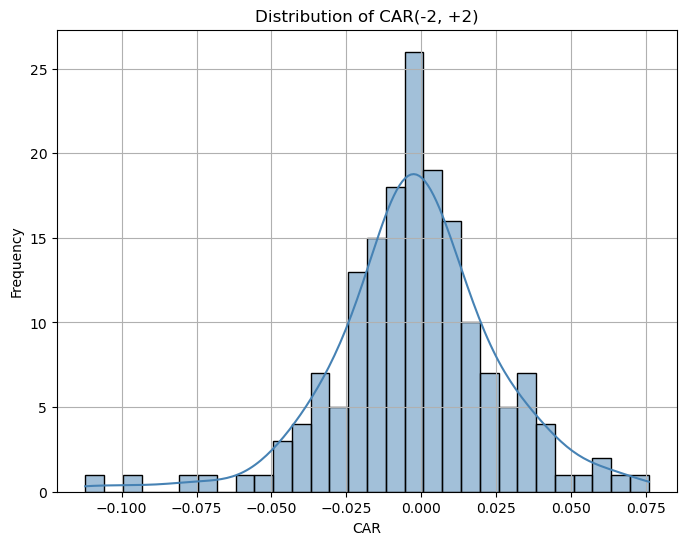

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.histplot(df_car["CAR_m2_p2"], bins=30, kde=True, color="steelblue")
plt.title("Distribution of CAR(-2, +2)")
plt.xlabel("CAR")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

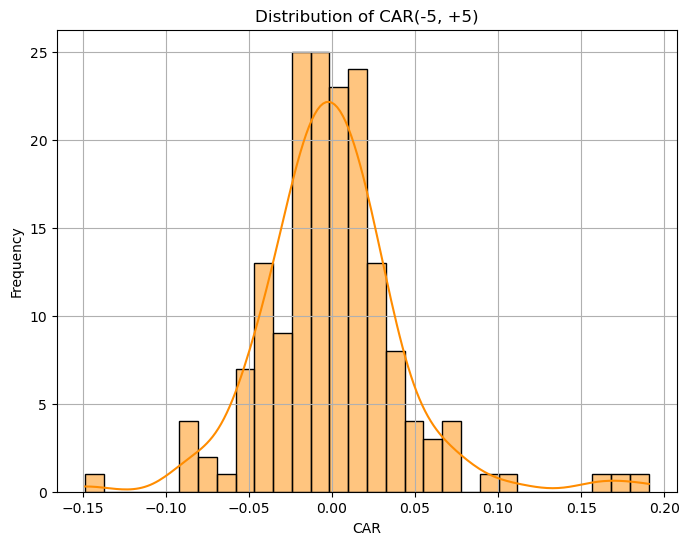

In [32]:
plt.figure(figsize=(8,6))
sns.histplot(df_car["CAR_m5_p5"], bins=30, kde=True, color="darkorange")
plt.title("Distribution of CAR(-5, +5)")
plt.xlabel("CAR")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

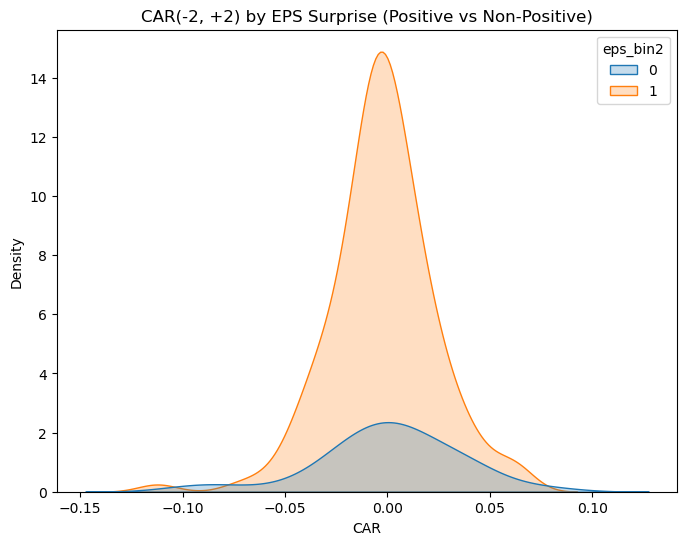

In [33]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=df_car, x="CAR_m2_p2", hue="eps_bin2", fill=True)
plt.title("CAR(-2, +2) by EPS Surprise (Positive vs Non-Positive)")
plt.xlabel("CAR")
plt.ylabel("Density")
plt.show()

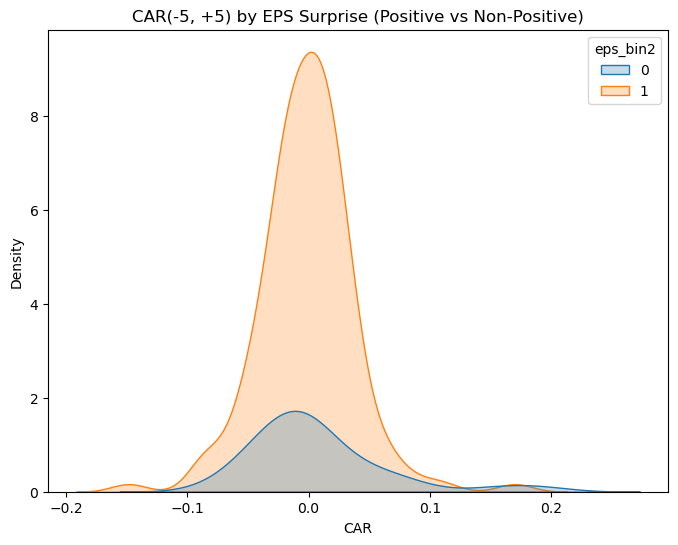

In [34]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=df_car, x="CAR_m5_p5", hue="eps_bin2", fill=True)
plt.title("CAR(-5, +5) by EPS Surprise (Positive vs Non-Positive)")
plt.xlabel("CAR")
plt.ylabel("Density")
plt.show()

In [35]:
import statsmodels.api as sm

X = sm.add_constant(df_car[["eps_bin2"]])
y = df_car["CAR_m2_p2"]

model_m2_p2 = sm.OLS(y, X).fit()
print(model_m2_p2.summary())

                            OLS Regression Results                            
Dep. Variable:              CAR_m2_p2   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.3188
Date:                Sun, 15 Feb 2026   Prob (F-statistic):              0.573
Time:                        10:18:56   Log-Likelihood:                 373.34
No. Observations:                 171   AIC:                            -742.7
Df Residuals:                     169   BIC:                            -736.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.005      0.078      0.9

In [36]:
X = sm.add_constant(df_car[["eps_bin2"]])
y = df_car["CAR_m5_p5"]

model_m5_p5 = sm.OLS(y, X).fit()
print(model_m5_p5.summary())

                            OLS Regression Results                            
Dep. Variable:              CAR_m5_p5   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.031
Date:                Sun, 15 Feb 2026   Prob (F-statistic):              0.311
Time:                        10:19:03   Log-Likelihood:                 299.09
No. Observations:                 171   AIC:                            -594.2
Df Residuals:                     169   BIC:                            -587.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0067      0.007      0.916      0.3